In [3]:
import os
import sys
sys.path.insert(0, os.path.abspath('../'))
import datetime
import IPython
import IPython.display
#from ipywidgets import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import seaborn as sns
import tensorflow as tf
import scipy
from scipy.spatial import distance
import cv2
import matplotlib.patheffects as pe
from TrajectoryObject import TrajectoryObj
from FileIO import write_trajectory, read_trajectory, read_mosaic, read_localization, read_andi2_trajectory_label
from andi_datasets.models_phenom import models_phenom
from andi_datasets.datasets_phenom import datasets_phenom
from andi_datasets.utils_trajectories import plot_trajs
from andi_datasets.utils_challenge import label_continuous_to_list
from stochastic import random as strandom
from stochastic.processes.continuous import FractionalBrownianMotion
from skimage.restoration import denoise_tv_chambolle

#%matplotlib widget

print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.17.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [53]:
trajs_model, labels_model = models_phenom().multi_state(N=2,
                                                        L=None,
                                                        T=64,
                                                        alphas=[1.0, 1.0],
                                                        Ds=[[0.05, 0.0], [0.05, 0.0]],
                                                        M=[[1.00, 0.00], [0.00, 1.00]]
                                                       )
x = trajs_model[:, 0, 0]
y = trajs_model[:, 0, 1]
changepoints, alphas_cp, Ds, state_num = label_continuous_to_list(labels_model[:, 0, :])
changepoints = changepoints[:-1]

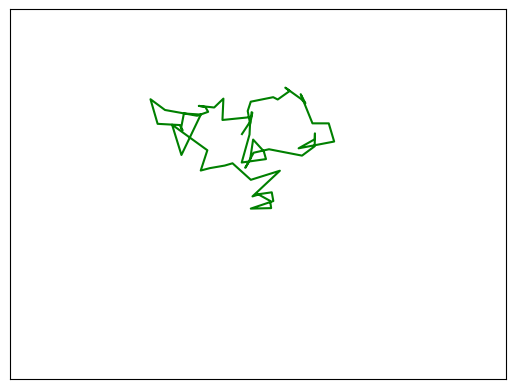

In [54]:
fig = plt.figure()
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.0)
plt.plot(x, y, c='green')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.xticks([])
plt.yticks([])
plt.savefig('./traj.png', transparent=True)
plt.show()